CASA0013 - Introduction to Programming for Spatial Analysis.  
Student ID: 20158305  
Tittle: From home-sharing to a professional business: The case of Airbnb in London.

# Reproducible Analysis

This document uses data from the next sources:
#### - Airbnb Listings (October 2020)  
Source: Inside Airbnb http://insideairbnb.com/get-the-data.html  
This data is sourced from public information from the Airbnb site. According to the site  
it has been 'analysed, cleansed and aggregated where appropriate to faciliate public discussion.'
The Airbnb data used in this document is from October 2020.

#### - MSOAs Atlas  
Source: London Data Store, U.K.  https://data.london.gov.uk/dataset/msoa-atlas  
Summary of demographic and related data for each Middle Super Output Area in Greater London.  
This data was collected in the last Census 2011.

#### - Rental Market Statistics 
Source: Office for National Statistics, U.K.   https://www.ons.gov.uk/peoplepopulationandcommunity/housing/adhocs/12435privaterentalmarketinlondonoctober2019toseptember2020
Summary of the monthly rents recorded between October 2019 and September 2020 by borough and bedroom category for London.  
These statistics use the Valuation Office Agency's data collected by Rent Officers from landlords and letting agents.

#### - MSOAs shapefile 
Source: Office for National Statistics, U.K. 
Original : https://data.gov.uk/dataset/2cf1f346-2f74-4c06-bd4b-30d7e4df5ae7/middle-layer-super-output-area-msoa-boundaries
Used from this source: https://github.com/jreades/i2p/tree/master/data/src
This file contains the digital vector boundaries for Middle Layer Super Output Areas for England and Wales as at 31 December 2011. 

#### - London Local Authority 
This file contains the digital vector boundaries for Local Authorities in London.  
Used from this source: https://github.com/jreades/i2p/tree/master/data/src  
  
  
The data compendium can be found in the next source:
https://github.com/francicabrera/i2P_assessment/tree/main/Data

This document uses code from the CASA0013 - Introduction to Programming for Spatial Analysis practicals.  
Codes can be found here: https://github.com/jreades/i2p/tree/master/practicals  
Other sources are mentioned in each specific code block.

### Import the packages that will be used throughout the process. 

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import figure
from urllib.request import urlopen
import csv
import inspect

## 1. Data manipulation

### 1.2.1. Create the London MSOAs gpd that will be used for the analysis.

In [2]:
# Import data of MSOAs into a geodataframe
msoas = gpd.read_file('https://github.com/francicabrera/i2P_assessment/blob/main/Data/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')

/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

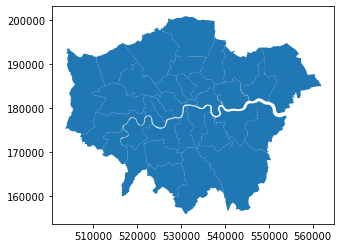

In [3]:
# Import data of London boroughs
boros = gpd.read_file('https://github.com/francicabrera/i2P_assessment/blob/main/Data/Boroughs.gpkg?raw=true')
boros.plot()

In [4]:
# Import data of with MSOAs names into a dataframe
msoa_nms = pd.read_csv('https://github.com/francicabrera/i2P_assessment/blob/main/Data/MSOA-Names-1.8.csv.gz?raw=true', compression='gzip')

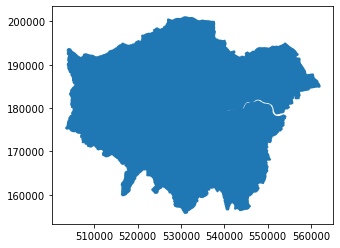

In [5]:
# Obtain the London boundary
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

# In order to ensure that we get all MSOAs _within_ London 
# we will buffer the boundary by 250m. 
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

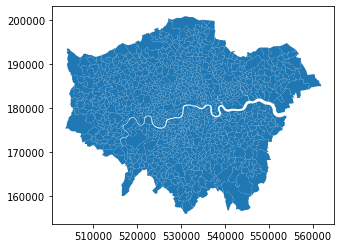

In [6]:
# Select London MSOAs using a Spatial Join
# By default it will be an _inner_ join.
ldn_msoas = gpd.sjoin(msoas, ldn, op='within')
ldn_msoas.plot();


In [56]:
ldn_msoas

,OBJECTID,MSOA11CD,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,index_right,original,Borough
0,1,E02000001,City of London 001,City of London 001,532384,181355,-0.093490,51.51561,2.906361e+06,8936.818478,"POLYGON ((532135.138 182198.131, 532158.250 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",City of London
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,548267,189685,0.138756,51.58652,2.166163e+06,8150.405928,"POLYGON ((548881.563 190845.265, 548881.125 19...",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",Barking and Dagenham
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,548259,188520,0.138149,51.57605,2.143568e+06,9118.196243,"POLYGON ((549102.438 189324.625, 548954.517 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",Barking and Dagenham
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,551004,186412,0.176828,51.55638,2.491467e+06,8206.551627,"POLYGON ((551550.056 187364.705, 551478.000 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",Barking and Dagenham
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,548733,186824,0.144267,51.56069,1.186053e+06,6949.688798,"POLYGON ((549099.634 187656.076, 549161.375 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",Barking and Dagenham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,6784,E02006927,Greenwich 034,Greenwich 034,540765,175168,0.024750,51.45799,2.526112e+06,8592.913078,"POLYGON ((541029.881 176265.023, 541101.997 17...",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",Greenwich
6784,6785,E02006928,Greenwich 035,Greenwich 035,537902,177443,-0.015540,51.47914,5.405753e+05,6849.063388,"MULTIPOLYGON (((538300.370 177956.634, 538290....",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",Greenwich
6785,6786,E02006929,Greenwich 036,Greenwich 036,540015,179091,0.015515,51.49343,2.550052e+06,13109.533457,"POLYGON ((540054.362 179353.134, 540220.354 17...",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",Greenwich
6786,6787,E02006930,Greenwich 037,Greenwich 037,540126,178333,0.016812,51.48659,8.679553e+05,7492.395145,"POLYGON ((539552.478 178604.042, 539533.000 17...",0,"POLYGON ((535009.200 159504.700, 535005.500 15...",Greenwich


In [7]:
# Use a regex (in `str.replace()`) to extract the LA name from the MSOA name.
# Create a new column with Borough's names.
# Borough's names are in column MSOA11NM.
# Use a regex (in str.replace()) to extract the LA name from the MSOA name.
ldn_msoas['Borough'] = ldn_msoas.MSOA11NM.str.replace(r' \d+$','',regex=True)

# - Total of boroughs = 33 boroughs
# - A df shape of 983 x 14
print(ldn_msoas.Borough.unique())
print(len(ldn_msoas.Borough.unique()))
print(ldn_msoas.shape)

['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
33
(983, 14)


In [8]:
# Add MSOA Names using a Merge
# Merge by 'MSOA11CD' in London MSOAs and 'msoa11cd' in MSOAs names dataframe.
msoas = pd.merge(ldn_msoas, msoa_nms, left_on='MSOA11CD', right_on='msoa11cd', how='inner')
print(msoas.shape)

(983, 20)


In [9]:
print(type(msoas)) # You should check this is a GeoDataFrame
# Check the output on a sample.
msoas.sample(3, random_state=42)[['OBJECTID','MSOA11CD','MSOA11NM','msoa11hclnm']]

<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,MSOA11CD,MSOA11NM,msoa11hclnm
810,811,E02000841,Sutton 002,St Helier South
801,802,E02000832,Southwark 026,Nunhead North
813,814,E02000844,Sutton 005,The Wrythe


In [10]:
# Tidy up the fields
to_drop = ['MSOA11NMW','LONG','LAT','Shape__Are','Shape__Len','index_right',
           'original','msoa11cd','msoa11nm','msoa11nmw','Laname','msoa11hclnmw']
msoas.drop(columns=to_drop, inplace=True)
print(msoas.shape)

(983, 8)


In [11]:
# Save the data
msoas.to_file(os.path.join('data','geo','London_MSOAs.gpkg'), driver='GPKG')

### 1.2.2. Import and clean Airbnb Data and create a geodataframe

In [12]:
# Import Inside Airbnb London Data
# define the columns that will be used in the analysis

cols = ['id','name','price','latitude','longitude','property_type','room_type','host_total_listings_count','host_id', 'host_identity_verified','host_verifications','availability_365','minimum_nights','maximum_nights','number_of_reviews','listing_url']
Airbnb = pd.read_csv('https://github.com/francicabrera/i2P_assessment/blob/main/Data/2020-08-24-listings.csv.gz?raw=true', usecols=cols, compression='gzip', low_memory=False)

In [13]:
# check number of rows and columns
print(Airbnb.shape)

(74188, 16)


In [14]:
# Remove the '$' and ','.
Airbnb['price'] = Airbnb.price.str.replace('$','').str.replace(',','').astype(float)
# Drop nulls from latitude and Longitude.
Airbnb.drop(Airbnb[((Airbnb.latitude.isna())|(Airbnb.longitude.isna()))].index, axis=0, inplace=True)
# Drop coordinates out of range from latitude and Longitude.
Airbnb.drop(Airbnb[((Airbnb.latitude < 40)|(Airbnb.longitude > 1))].index, axis=0, inplace=True)
print(Airbnb.shape)

(74184, 16)


/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [15]:
Airbnb.isnull().sum(axis=0).sort_values(ascending=False)[:12]

name                         21
host_total_listings_count     9
host_identity_verified        9
id                            0
listing_url                   0
host_id                       0
host_verifications            0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
price                         0
dtype: int64

In [16]:
Airbnb[Airbnb.id.isna()]

,id,listing_url,name,host_id,host_total_listings_count,host_verifications,host_identity_verified,latitude,longitude,property_type,room_type,price,minimum_nights,maximum_nights,availability_365,number_of_reviews


In [17]:
# Drop listings were hosts are not verified.
# We will assume that hosts with no verifications could be scams.
Airbnb.drop(Airbnb[((Airbnb.host_identity_verified != 't'))].index, axis=0, inplace=True)
Airbnb.drop(Airbnb[((Airbnb.host_verifications.isna()))].index, axis=0, inplace=True)
Airbnb.drop(Airbnb[((Airbnb.number_of_reviews.isna()))].index, axis=0, inplace=True) # proxy for active listings
Airbnb.drop(Airbnb[((Airbnb.host_identity_verified.isna()))].index, axis=0, inplace=True)
Airbnb.drop(Airbnb[((Airbnb.name.isna()))].index, axis=0, inplace=True)
print(Airbnb.shape)


(56125, 16)


In [18]:
# Convert intergers in floats
ints  = ['id','host_id','host_total_listings_count','minimum_nights','maximum_nights','availability_365',]
for i in ints:
    print(f"Converting {i}")
    try:
        Airbnb[i] = Airbnb[i].astype('float').astype('int')
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        Airbnb[i] = Airbnb[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_total_listings_count
Converting minimum_nights
Converting maximum_nights
Converting availability_365


In [19]:
# Convert objects into category
# Create df with the categories
cats = ['property_type','room_type']
# Inspect the values
Airbnb.sample(5, random_state=43)[cats]
# Convert
for c in cats:
    print(f"Converting {c}")
    Airbnb[c] = Airbnb[c].astype('category')

Converting property_type
Converting room_type


In [20]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56125 entries, 1 to 74187
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         56125 non-null  int64   
 1   listing_url                56125 non-null  object  
 2   name                       56125 non-null  object  
 3   host_id                    56125 non-null  int64   
 4   host_total_listings_count  56125 non-null  int64   
 5   host_verifications         56125 non-null  object  
 6   host_identity_verified     56125 non-null  object  
 7   latitude                   56125 non-null  float64 
 8   longitude                  56125 non-null  float64 
 9   property_type              56125 non-null  category
 10  room_type                  56125 non-null  category
 11  price                      56125 non-null  float64 
 12  minimum_nights             56125 non-null  int64   
 13  maximum_nights             5612

In [21]:
# Summary statistics
Airbnb.describe()

,id,host_id,host_total_listings_count,latitude,longitude,price,minimum_nights,maximum_nights,availability_365
count,5.612500e+04,5.612500e+04,56125.000000,56125.000000,56125.000000,56125.000000,56125.000000,5.612500e+04,56125.000000
mean,2.538943e+07,8.623161e+07,29.067866,51.510120,-0.129310,126.648087,5.024125,2.788283e+04,132.228971
std,1.299393e+07,9.462351e+07,132.406134,0.044355,0.089693,277.611178,20.425657,4.767097e+06,142.937143
min,1.391300e+04,2.010000e+03,0.000000,51.294790,-0.496250,0.000000,1.000000,1.000000e+00,0.000000
25%,1.523003e+07,1.355734e+07,1.000000,51.487310,-0.187470,48.000000,1.000000,6.000000e+01,0.000000
50%,2.593165e+07,4.255423e+07,2.000000,51.514140,-0.128460,83.000000,2.000000,1.125000e+03,86.000000
75%,3.740756e+07,1.370944e+08,6.000000,51.536500,-0.072310,139.000000,3.000000,1.125000e+03,270.000000
max,4.509040e+07,3.639824e+08,1309.000000,51.681690,0.268950,18638.000000,1124.000000,1.000000e+09,365.000000


In [22]:
# Create the geodataframe
ABgdf = gpd.GeoDataFrame(Airbnb, geometry=gpd.points_from_xy(Airbnb.longitude, Airbnb.latitude, crs='epsg:4326'))
# Project to epsg:27700
ABgdf = ABgdf.to_crs('epsg:27700')

In [23]:
# Add LA Names to Data
# Associate LA (Local Authority) names to the listings using a spatial join:
ABgdf_la = gpd.sjoin(ABgdf, boros, op='within', how='left')
print(ABgdf_la.columns.values)

['id' 'listing_url' 'name' 'host_id' 'host_total_listings_count'
 'host_verifications' 'host_identity_verified' 'latitude' 'longitude'
 'property_type' 'room_type' 'price' 'minimum_nights' 'maximum_nights'
 'availability_365' 'number_of_reviews' 'geometry' 'index_right' 'NAME'
 'GSS_CODE' 'HECTARES' 'NONLD_AREA' 'ONS_INNER']


In [24]:
# Check a sample of the data
print(ABgdf_la.shape)
ABgdf_la.sample(3, random_state=42)[['id','name','NAME']]

(56125, 23)


,id,name,NAME
28448,20810325,Modern Lovely Studio Apartment in Central London,Tower Hamlets
33854,23523171,Immaculate 3BR in fashionable Islington!,Islington
8055,7008408,Bright Central London Apt-3rd floor,Camden


In [25]:
# Remove the fields that will not be used.
ABgdf_la.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)

In [26]:
# Check for nulls in the data.
ABgdf[ABgdf_la.NAME.isna()][['id','name', 'host_id']] 

,id,name,host_id
24473,18841368,"Luxury Double Room, King Size Bed near to 02 A...",88025594
38487,26648789,London Riverview Flat - Excel and City Airport,32512693
70689,43596360,Modern river view apartment near the centre,54337856
70824,43685598,Thames view apartment in Battersea,247789015
70954,43755065,Cosy friendly house set in a peaceful environm...,321800653
72172,44211247,Luxury room in shared 2 bed waterfront apartment,692114
72350,44273549,Exclusive Bright Studio - Central London,40385554
72959,44477130,PitStop,168238288
73083,44527847,Large bedroom within 2 minutes from Victoria line,142203610
73699,44785285,Excellently Located Contemporary 1 Bed Lond Ap...,319517616


In [27]:
# Drop the nulls.
ABgdf_la.drop(index=ABgdf[ABgdf_la.NAME.isna()].index, axis=1, inplace=True)

In [28]:
# Add MSOA Names to Data
# Associate MSOA names to the listings using a spatial join:
ABgdf_msoas = gpd.sjoin(ABgdf_la, msoas, op='within', how='left')
print(ABgdf_la.columns.values)
print(ABgdf_la.shape)

['id' 'listing_url' 'name' 'host_id' 'host_total_listings_count'
 'host_verifications' 'host_identity_verified' 'latitude' 'longitude'
 'property_type' 'room_type' 'price' 'minimum_nights' 'maximum_nights'
 'availability_365' 'number_of_reviews' 'geometry' 'NAME' 'GSS_CODE']
(56114, 19)


In [29]:
# Check for listings that could be outside of the london boundary
ABgdf_msoas[ABgdf_msoas.MSOA11CD.isna()]

#Drop them
ABgdf_msoas.drop(index = ABgdf_msoas[ABgdf_msoas.MSOA11CD.isna()].index, axis=1, inplace=True )
print(ABgdf_msoas.shape)

(56099, 27)


In [30]:
# Remove the fields that will not be used.
ABgdf_msoas.drop(columns=['index_right','OBJECTID','BNG_E','BNG_N','msoa11hclnm'], inplace=True)

In [31]:
ABgdf_msoas

,id,listing_url,name,host_id,host_total_listings_count,host_verifications,host_identity_verified,latitude,longitude,property_type,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,geometry,NAME,GSS_CODE,MSOA11CD,MSOA11NM,Borough
1,13913,https://www.airbnb.com/rooms/13913,Holiday London DB Room Let-on going,54730,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,51.56802,-0.11121,Private room in apartment,...,1,29,364,21,POINT (531005.968 187150.843),Islington,E09000019,E02000556,Islington 003,Islington
2,15400,https://www.airbnb.com/rooms/15400,Bright Chelsea Apartment. Chelsea!,60302,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,51.48796,-0.16898,Entire apartment,...,10,50,359,89,POINT (527225.119 178145.995),Kensington and Chelsea,E09000020,E02000595,Kensington and Chelsea 019,Kensington and Chelsea
3,17402,https://www.airbnb.com/rooms/17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,18,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,51.52195,-0.14094,Entire apartment,...,4,365,1,42,POINT (529075.790 181974.865),Westminster,E09000033,E02000972,Westminster 013,Westminster
4,17506,https://www.airbnb.com/rooms/17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,3,"['email', 'phone', 'jumio', 'selfie', 'governm...",t,51.47935,-0.19743,Private room in bed and breakfast,...,3,21,364,0,POINT (525273.544 177139.513),Hammersmith and Fulham,E09000013,E02000392,Hammersmith and Fulham 021,Hammersmith and Fulham
5,25123,https://www.airbnb.com/rooms/25123,Clean big Room in London (Room 1),103583,3,"['email', 'phone', 'reviews', 'offline_governm...",t,51.57224,-0.20906,Private room in house,...,10,1120,1,129,POINT (524213.146 187449.516),Barnet,E09000003,E02000060,Barnet 037,Barnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74181,45087861,https://www.airbnb.com/rooms/45087861,Luxury 2 bed apartment,282435378,1,"['email', 'phone', 'offline_government_id', 's...",t,51.65345,-0.07276,Entire apartment,...,1,3,317,0,POINT (533420.128 196720.560),Enfield,E09000010,E02000285,Enfield 009,Enfield
74182,45088266,https://www.airbnb.com/rooms/45088266,"Large room , with garden close to central London",363982442,0,"['phone', 'offline_government_id', 'selfie', '...",t,51.54431,-0.12077,Private room in house,...,1,1125,337,0,POINT (530411.178 184497.123),Islington,E09000019,E02000568,Islington 015,Islington
74183,45088408,https://www.airbnb.com/rooms/45088408,Easy access into Central London,133104947,0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,51.49215,-0.04207,Entire apartment,...,30,180,361,0,POINT (536023.330 178839.934),Southwark,E09000028,E02000814,Southwark 008,Southwark
74184,45088653,https://www.airbnb.com/rooms/45088653,Wonderful House in West London,37676062,0,"['email', 'phone', 'jumio', 'government_id', '...",t,51.52589,-0.29282,Entire house,...,7,1125,341,0,POINT (518529.065 182156.270),Ealing,E09000009,E02000248,Ealing 011,Ealing


### 1.2.3. Import and clean MSOA census data and create a geodataframe

In [32]:
# Import the MSOAs Census Data
# When ecoding to UTF-8, it presents an error. Define encoding= 'unicode_escape'
cols2 = ['Middle Super Output Area','MSOA Name', 'Tenure (2011);Social rented;', 'Tenure (2011);Private rented;','Tenure (2011);Owned: Owned outright;','Tenure (2011);Owned: Owned with a mortgage or loan;','House Prices;Median House Price (£);2011']
census = pd.read_csv('https://data.london.gov.uk/download/msoa-atlas/20264159-36cb-4aa2-8371-ae884ae83e88/msoa-data.csv', usecols=cols2, encoding= 'unicode_escape')

In [33]:
# Replace empty spaces with "_".
census.columns = [c.replace(' ', '_') for c in census.columns]
# Drop nulls from the code 
census.drop(index=census[census.Middle_Super_Output_Area.isna()].index, axis=1, inplace=True)

In [34]:
# Rename columns
census.rename(columns={'Middle_Super_Output_Area':'MSOA11CD',
                       'MSOA_Name':'MSOA11NM',
                       'Tenure_(2011);Social_rented;': 'Social_rented',
                       'Tenure_(2011);Private_rented;': 'Private_rented',
                       'Tenure_(2011);Owned:_Owned_outright;':'Owned_outright',
                       'Tenure_(2011);Owned:_Owned_with_a_mortgage_or_loan;':'Owned_with_loan', 
                       'House_Prices;Median_House_Price_(£);2011': 'Median_House_Price'},
              inplace=True)

In [35]:
# Use a regex (in `str.replace()`) to extract the LA name from the MSOA name.
# Create a new column with Borough's names.
# Borough's names are in column MSOA11NM.
# Use a regex (in str.replace()) to extract the LA name from the MSOA name.
census['Borough'] = census.MSOA11NM.str.replace(r' \d+$','',regex=True)

In [36]:
#check the data frame
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MSOA11CD            983 non-null    object
 1   MSOA11NM            983 non-null    object
 2   Owned_outright      983 non-null    int64 
 3   Owned_with_loan     983 non-null    int64 
 4   Social_rented       983 non-null    int64 
 5   Private_rented      983 non-null    int64 
 6   Median_House_Price  983 non-null    int64 
 7   Borough             983 non-null    object
dtypes: int64(5), object(3)
memory usage: 69.1+ KB


In [37]:
# Add Census data to Airbnb data
# Associate census to the listings through the field MSOA11CD.
ABgdf_msoas = gpd.sjoin(ABgdf_la, msoas, op='within', how='left')
print(ABgdf_la.columns.values)

['id' 'listing_url' 'name' 'host_id' 'host_total_listings_count'
 'host_verifications' 'host_identity_verified' 'latitude' 'longitude'
 'property_type' 'room_type' 'price' 'minimum_nights' 'maximum_nights'
 'availability_365' 'number_of_reviews' 'geometry' 'NAME' 'GSS_CODE']


In [38]:
# Add Census data to Airbnb data
# Associate census to the listings through the field MSOA11CD.
DATA_gdf = pd.merge(ABgdf_msoas, census, left_on='MSOA11CD', right_on='MSOA11CD', how='inner')
print(DATA_gdf.columns.values)

['id' 'listing_url' 'name' 'host_id' 'host_total_listings_count'
 'host_verifications' 'host_identity_verified' 'latitude' 'longitude'
 'property_type' 'room_type' 'price' 'minimum_nights' 'maximum_nights'
 'availability_365' 'number_of_reviews' 'geometry' 'NAME' 'GSS_CODE'
 'index_right' 'OBJECTID' 'MSOA11CD' 'MSOA11NM_x' 'BNG_E' 'BNG_N'
 'Borough_x' 'msoa11hclnm' 'MSOA11NM_y' 'Owned_outright' 'Owned_with_loan'
 'Social_rented' 'Private_rented' 'Median_House_Price' 'Borough_y']


In [39]:
DATA_gdf = DATA_gdf.drop(columns=['MSOA11NM_y', 'Borough_x']).rename(columns={'Borough_y':'Borough', 'MSOA11NM_x':'MSOA11NM' })

In [40]:
print(f"Final MSOA Atlas data frame has shape {DATA_gdf.shape[0]:,} x {DATA_gdf.shape[1]}")

Final MSOA Atlas data frame has shape 56,099 x 32


### 1.2.4. Import and clean VOA rental data and join with census data frame

The original format of this data is .xls, but had to be exported to .csv due some issues while reading the document from this source: https://github.com/francicabrera/i2P_assessment/blob/main/Data/londonrentalstatisticsq32020-2.xls

The original data can be found in this source: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/adhocs/12435privaterentalmarketinlondonoctober2019toseptember2020

In [41]:
# Import the rentals data
cols2 = ['Borough','Median','Bedroom Category']
rentals_data = pd.read_csv('https://raw.githubusercontent.com/francicabrera/i2P_assessment/main/Data/londonrentalstatistics.csv', usecols =cols2)

In [42]:
# Remove the Bedroom Category = room from the data
# We only need the entire places.
rentals_data.drop(rentals_data.loc[rentals_data['Bedroom Category']=='Room'].index, inplace=True)

In [43]:
# pivot the table to have the bedrooms categories as columns
Rentals = rentals_data.pivot(index='Borough',columns=['Bedroom Category'], values=['Median']).reset_index()
Rentals.head()

Borough                Median              \
Bedroom Category                       Four or More Bedrooms One Bedroom   
0                 Barking and Dagenham                  1675        1000   
1                               Barnet                  2413        1150   
2                               Bexley                  1550         850   
3                                Brent                  2100        1200   
4                              Bromley                  2000        1000   

                                                     
Bedroom Category Studio Three Bedrooms Two Bedrooms  
0                   730           1400         1200  
1                   900           1799         1400  
2                   700           1300         1100  
3                   910           1775         1447  
4                   800           1550         1250

In [44]:
Rentals.columns = ['Borough','Four or More Bedrooms','One Bedroom','Studio','Three Bedrooms','Two Bedrooms']
Rentals.head()

,Borough,Four or More Bedrooms,One Bedroom,Studio,Three Bedrooms,Two Bedrooms
0,Barking and Dagenham,1675,1000,730,1400,1200
1,Barnet,2413,1150,900,1799,1400
2,Bexley,1550,850,700,1300,1100
3,Brent,2100,1200,910,1775,1447
4,Bromley,2000,1000,800,1550,1250


### 2. DATA EXPLORATION

#### 2.1. Summary Statistics

In [45]:
# Airbnb data
Airbnb.describe()

,id,host_id,host_total_listings_count,latitude,longitude,price,minimum_nights,maximum_nights,availability_365
count,5.612500e+04,5.612500e+04,56125.000000,56125.000000,56125.000000,56125.000000,56125.000000,5.612500e+04,56125.000000
mean,2.538943e+07,8.623161e+07,29.067866,51.510120,-0.129310,126.648087,5.024125,2.788283e+04,132.228971
std,1.299393e+07,9.462351e+07,132.406134,0.044355,0.089693,277.611178,20.425657,4.767097e+06,142.937143
min,1.391300e+04,2.010000e+03,0.000000,51.294790,-0.496250,0.000000,1.000000,1.000000e+00,0.000000
25%,1.523003e+07,1.355734e+07,1.000000,51.487310,-0.187470,48.000000,1.000000,6.000000e+01,0.000000
50%,2.593165e+07,4.255423e+07,2.000000,51.514140,-0.128460,83.000000,2.000000,1.125000e+03,86.000000
75%,3.740756e+07,1.370944e+08,6.000000,51.536500,-0.072310,139.000000,3.000000,1.125000e+03,270.000000
max,4.509040e+07,3.639824e+08,1309.000000,51.681690,0.268950,18638.000000,1124.000000,1.000000e+09,365.000000


In [46]:
# Total of listings with availability for more than 90 days.
Morelimit90 = Airbnb.groupby(['host_id','availability_365'])['availability_365'].agg(Count='count').reset_index() 

In [47]:
Morelimit902 = Morelimit90[Morelimit90['availability_365']>90] 
Morelimit902.describe()

,host_id,availability_365,Count
count,1.961700e+04,19617.000000,19617.000000
mean,9.416200e+07,267.392466,1.254677
std,1.009459e+08,90.720589,2.193899
min,4.775000e+03,91.000000,1.000000
25%,1.287435e+07,179.000000,1.000000
50%,4.753904e+07,295.000000,1.000000
75%,1.540562e+08,359.000000,1.000000
max,3.639824e+08,365.000000,226.000000


In [48]:

# Morelistg = DATA_gdf.groupby(['id','host_total_listings_count'])['host_total_listings_count'].agg(Count='count').reset_index() 
# Morelistg2 =Morelistg[Morelistg['host_total_listings_count']>1] 
# Morelistg2.describe()
# Total of listings owned by hosts with more than one listing 
Morelistg = Airbnb[Airbnb['host_total_listings_count']>1] 
Morelistg.describe()
Morelistg

,id,listing_url,name,host_id,host_total_listings_count,host_verifications,host_identity_verified,latitude,longitude,property_type,room_type,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,geometry
1,13913,https://www.airbnb.com/rooms/13913,Holiday London DB Room Let-on going,54730,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,51.56802,-0.11121,Private room in apartment,Private room,49.0,1,29,364,21,POINT (-0.11121 51.56802)
3,17402,https://www.airbnb.com/rooms/17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,18,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,51.52195,-0.14094,Entire apartment,Entire home/apt,208.0,4,365,1,42,POINT (-0.14094 51.52195)
4,17506,https://www.airbnb.com/rooms/17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,3,"['email', 'phone', 'jumio', 'selfie', 'governm...",t,51.47935,-0.19743,Private room in bed and breakfast,Private room,150.0,3,21,364,0,POINT (-0.19743 51.47935)
5,25123,https://www.airbnb.com/rooms/25123,Clean big Room in London (Room 1),103583,3,"['email', 'phone', 'reviews', 'offline_governm...",t,51.57224,-0.20906,Private room in house,Private room,29.0,10,1120,1,129,POINT (-0.20906 51.57224)
6,33332,https://www.airbnb.com/rooms/33332,Beautiful Ensuite Richmond-upon-Thames borough,144444,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,51.46507,-0.32421,Private room in house,Private room,65.0,1,21,364,6,POINT (-0.32421 51.46507)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74168,45083651,https://www.airbnb.com/rooms/45083651,Private room in light apartment,70477678,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,51.53770,-0.24960,Private room in apartment,Private room,36.0,5,1125,364,0,POINT (-0.24960 51.53770)
74170,45083688,https://www.airbnb.com/rooms/45083688,Light Willesden apartment with Garden,70477678,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,51.53774,-0.24848,Entire apartment,Entire home/apt,75.0,1,1125,359,0,POINT (-0.24848 51.53774)
74172,45084351,https://www.airbnb.com/rooms/45084351,Well appointed 2 double bed apartment in Bow,12860988,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,51.53280,-0.02168,Entire apartment,Entire home/apt,90.0,60,1125,342,0,POINT (-0.02168 51.53280)
74173,45084798,https://www.airbnb.com/rooms/45084798,"Cosy private Studio flat, available long term",101116119,6,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,51.51190,-0.02780,Entire apartment,Entire home/apt,55.0,150,1125,365,0,POINT (-0.02780 51.51190)


In [49]:
# Entire room counts
Entroom = Airbnb.groupby(['host_id','room_type'])['room_type'].agg(Count='count').reset_index()
Entroom.describe()

,host_id,Count
count,1.335720e+05,133572.000000
mean,7.511661e+07,0.420185
std,8.993214e+07,2.887939
min,2.010000e+03,0.000000
25%,1.111584e+07,0.000000
50%,3.519430e+07,0.000000
75%,1.073373e+08,1.000000
max,3.639824e+08,717.000000


In [50]:
# Dwellings in London according to VOA
rentals_data.describe()

,Median
count,165.000000
mean,1637.854545
std,944.564710
min,0.000000
25%,1100.000000
50%,1447.000000
75%,1950.000000
max,7323.000000


#### 2.2. Map of density of listings  
Let's observe how the listings are distributed in London

In [51]:
Map0 = DATA_gdf.groupby(['MSOA11CD','MSOA11NM'])['MSOA11NM'].agg(Count='count').reset_index()
Map0.head()

,MSOA11CD,MSOA11NM,Count
0,E02000001,City of London 001,378
1,E02000002,Barking and Dagenham 001,6
2,E02000003,Barking and Dagenham 002,8
3,E02000004,Barking and Dagenham 003,1
4,E02000005,Barking and Dagenham 004,9


In [52]:
# Merge back with the gdf
Map0_gdf = pd.merge(DATA_gdf, Map0, left_on='MSOA11CD', right_on='MSOA11CD', how='inner')
# Map0_gdf.plot() # plot the gdf

In [53]:
# Merge back with the msoas gdf
Map0b_gdf = pd.merge(msoas, Map0, left_on='MSOA11CD', right_on='MSOA11CD', how='inner')

In [54]:
# Borough with more listings
Boroslistings = Map0b_gdf.groupby(['MSOA11CD','Borough'])['Borough'].agg(Count='count').reset_index() 
Boroslistings.max()

MSOA11CD      E02006931
Borough     Westminster
Count                 1
dtype: object

ImportError: The 'mapclassify' >= 2.2.0 package is required to use the 'scheme' keyword

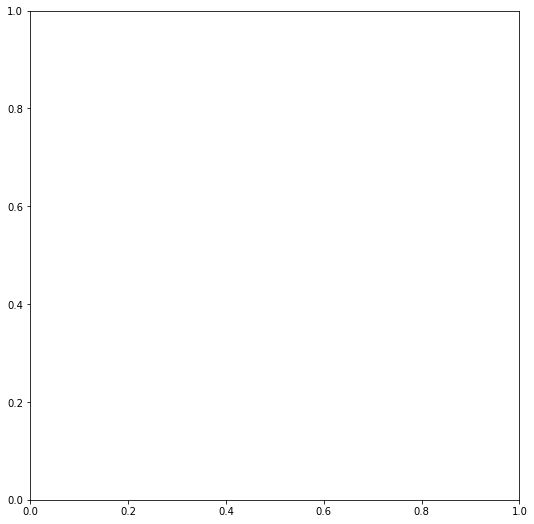

In [55]:
# Set the parameters to plot
f,ax = plt.subplots(figsize=(15,9))
Map0b_gdf.plot(column='Count', scheme = 'fisher_jenks', cmap='BuPu',k=7, legend=True, ax=ax,edgecolor='white', linewidth=0.8)
boros.plot(edgecolor=('#969696'), facecolor='none', linewidth=0.3, ax=ax)
ax.axis('off') #don't plot the axes (bounding box)
ax.set_title('London Airbnb Listings', fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
a = ax.annotate('Source: InsideAirbnb (2020)',
             xy=(0.905, 0.055), xycoords='figure fraction', 
             horizontalalignment='right', verticalalignment='bottom', 
             fontsize=12, fontweight=4, color='#555555')  #add source info on the image itself
a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
ax.get_legend().set_title("Active Listings")  #set the legend title

# x, y, arrow_length = 0.9, 0.99, 0.1 #set the position
# ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
#             arrowprops=dict(facecolor='#969696', width=3, headwidth=15, edgecolor='#969696'),
#             ha='center', va='center', fontsize=20, color = '#969696',
#             xycoords=ax.transAxes)
f.savefig('M1.png', dpi=150)

In [ ]:
#sns.scatterplot(data=Airbnb, x="longitude", y="latitude", figsize=(10,7), cmap = "GnBu")

In [ ]:

![](img/M1.png)

In [ ]:
# Airbnb.plot.hexbin(x='longitude', y='latitude', gridsize=100, figsize=(15,9), cmap = "GnBu")
# ax.axis('off') #don't plot the axes (bounding box)

In [ ]:
# Total of Airbnb entire home listings
total = Airbnb[Airbnb['room_type']=='Entire home/apt']
# Total of hosts with more than one entire home listings
total2 = total[total['host_total_listings_count']>1]
total2

#### 2.3 Map of Entire place listings (from Airbnb).
2.3.1. Group by MSOAS and count room type.  
2.3.2. Filter by Entire home or apartment.  
2.3.3. Set the parameters to plot.

In [ ]:
MAP1a = DATA_gdf.groupby(['MSOA11CD','room_type'])['room_type'].agg(Count='count').reset_index() # msoa listings grouped room type and with counts
Map1b = MAP1a[MAP1a['room_type']=='Entire home/apt'] # filtered by Entire home / apt
Map1b.head()

In [ ]:
print(type(MAP1a)) # check the type

In [ ]:
# Merge back with MSOAs geodataframe
Map1b_gdf = pd.merge(msoas, Map1b, left_on='MSOA11CD', right_on='MSOA11CD', how='inner')

In [ ]:
# Set the parameters to plot
f,ax = plt.subplots(figsize=(15,9))
Map1b_gdf.plot(column='Count', scheme = 'fisher_jenks', cmap='GnBu',k=10, legend=True, ax=ax,edgecolor='white', linewidth=0.8)
boros.plot(edgecolor=('#969696'), facecolor='none', linewidth=0.3, ax=ax)

ax.axis('off') #don't plot the axes (bounding box)
ax.set_title('London Airbnb Entire Place Listings', fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
a = ax.annotate('Source: Inside Airbnb (2020)',
             xy=(0.905, 0.055), xycoords='figure fraction', 
             horizontalalignment='right', verticalalignment='bottom', 
             fontsize=12, fontweight=4, color='#555555')  #add source info on the image itself
a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
ax.get_legend().set_title("Entire Place")  #set the legend title

# x, y, arrow_length = 0.9, 0.99, 0.1 #set the position
# ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
#             arrowprops=dict(facecolor='#969696', width=3, headwidth=15, edgecolor='#969696'),
#             ha='center', va='center', fontsize=20, color = '#969696',
#             xycoords=ax.transAxes)
f.savefig('M2.png', dpi=150)

#### 2.4. Map of Private rented homes (from Census)
2.4.1. Group by MSOAs and private rented homes.  
2.4.2. Set the parameters to plot.

In [ ]:
# Merge MSOA geodataframe with census dataframe
# Use the common field MSOA11CD
MAP2a_gdf = pd.merge(msoas, census, left_on='MSOA11CD', right_on='MSOA11CD', how='inner')

In [ ]:
# Set the parameters to plot
f,ax = plt.subplots(figsize=(15,9))
MAP2a_gdf.plot(column='Private_rented', scheme = 'fisher_jenks', cmap='GnBu',k=10, legend=True, ax=ax,edgecolor='white', linewidth=0.8)
boros.plot(edgecolor=('#969696'), facecolor='none', linewidth=0.3, ax=ax)

ax.axis('off') #don't plot the axes (bounding box)
ax.set_title('London Private Rented Homes', fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
a = ax.annotate('Source: ONS (2011)',
             xy=(0.905, 0.055), xycoords='figure fraction', 
             horizontalalignment='right', verticalalignment='bottom', 
             fontsize=12, fontweight=4, color='#555555')  #add source info on the image itself
a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
ax.get_legend().set_title("Entire Place")
#Add north arrow
# x, y, arrow_length = 0.9, 0.99, 0.1 #set the position
# ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
#             arrowprops=dict(facecolor='#969696', width=3, headwidth=15, edgecolor='#969696'),
#             ha='center', va='center', fontsize=20, color = '#969696',
#             xycoords=ax.transAxes)
f.savefig('M3.png', dpi=150)

### Boxplot  
This boxplot compares the price of the listings per room type

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="GnBu")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=DATA_gdf.price, x=DATA_gdf.room_type) # set the x,y values
ax.set(xlabel='Room Type', ylabel='Price per night') # set the x,y labels
sns.despine(offset=10)
ax.set_ylim([0,500])

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=DATA_gdf.host_total_listings_count, x=DATA_gdf.room_type)
sns.despine(offset=10)
ax.set_ylim([0,500])

### Correlation matrix 1
#### Listings vs rented/owned houses
This plot shows the correlation between the number of listings and the number  
of rented or owned houses in London.

For this plot we'll need the count of listings and we'll join them with the census dataframe.

In [ ]:
# Count number of listings by MSOA.
# From the DATA_gdf, group by MSOAs codes and count the listings in each MSOA.
Corr1a = DATA_gdf.groupby(['MSOA11CD','MSOA11NM'])['MSOA11NM'].agg(Count='count').reset_index()

# Rename the listings count column as 'Listings' to identify it in the correlation matrix
Corr1a.rename(columns = {'Count':'Listings'},inplace=True)

In [ ]:
# Join with the census data frame
Corr1b = pd.merge(Corr1a, census, left_on='MSOA11CD', right_on='MSOA11CD', how='inner' )

# Drop the columns that wont be used in the correlation analysis
Corr1b.drop(['MSOA11CD','MSOA11NM_x','MSOA11NM_y','Borough'], axis = 1,inplace=True)

# Check the output
Corr1b

In [ ]:
# Code source:  https://indianaiproduction.com/seaborn-heatmap/#:~:text=In%20python%20seaborn%20tutorial%2C%20we%20are%20going%20to,about%20step%20by%20step%20in%20later%20with%20practical.
# Also visit the official documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
corrMatrix = Corr1b.corr()
mask = np.zeros_like(corrMatrix) # mask to plot only part of a matrix
mask[np.triu_indices_from(mask)] = True

# set heatmap size
plt.figure(figsize= (8,5)) 
# create heatmap seaborn
cbar_kws = {"orientation":"vertical", 
            "shrink":1, 
            'extendfrac':0.1, 
            "ticks":np.arange(0,5), 
            "drawedges":True,
           } # color bar keyword arguments
 
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu",mask=mask, cbar_kws=cbar_kws, linewidths=2)
plt.title("Correlation Matrix (Listings, rental and house prices)", fontsize = 14)
#plt.show()
plt.savefig('C1.png', dpi=150,bbox_inches='tight')

### Correlation matrix 2
#### Listings vs house prices and rental rates
This plot shows the correlation between the number of listings and the median house  
prices and median rental rates in london.

For this plot we'll need the count of listings and we'll join them with the census dataframe  
and ONS rentals data by Borough.

In [ ]:
# Count number of listings by Borough.
# From the DATA_gdf, group by Borough's names and count the listings in each Borough.
Corr2a = DATA_gdf.groupby('Borough')['Borough'].agg(Count='count').reset_index()

# Rename the listings count column as 'Listings' to identify it in the correlation matrix
Corr2a.rename(columns = {'Count':'Listings'},inplace=True)
Corr2a.head()

In [ ]:
# Count house prices by Borough (this field contain the mean prices).
# From the census data frame, group by Borough's names and take the mean of the house prices.
Corr2b = census.groupby('Borough')['Median_House_Price'].agg('median').reset_index()
Corr2b.head()

In [ ]:
# Convert floats into interger
# Create df with the categories
cats = ['Median_House_Price']
# Inspect the values
Corr2b.sample(5, random_state=43)[cats]
# Convert
for c in cats:
    print(f"Converting {c}")
    Corr2b[c] = Corr2b[c].astype('int')

In [ ]:
# Join with the census data frame
Corr2c = pd.merge(Corr2a, Corr2b, left_on='Borough', right_on='Borough', how='inner' )
# Join with the rental data
Corr2d = pd.merge(Corr2c, Rentals, left_on='Borough', right_on='Borough', how='inner' )
# Drop the columns that wont be used in the correlation analysis
Corr2d.drop(['Borough'], axis = 1,inplace=True)

# # Check the output
Corr2d.head()

In [ ]:
# Rename the columns
Corr2d.rename(columns = {'Listings': 'Airbnb Listings',
                         'Median_House_Price': 'Median House Price',
                         'Four or More Bedrooms':'Median Rent Four or More Bedrooms',
                         'One Bedroom': 'Median Rent One Bedroom',
                         'Studio':'Median Rent Studio',
                         'Three Bedrooms':'Median Rent Three Bedrooms',
                         'Two Bedrooms':'Median Rent Two Bedrooms'
                        },inplace=True)

In [ ]:
# Calculate and plot the correlation indices
# Code source:  https://indianaiproduction.com/seaborn-heatmap/#:~:text=In%20python%20seaborn%20tutorial%2C%20we%20are%20going%20to,about%20step%20by%20step%20in%20later%20with%20practical.
# Also visit the official documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
corrMatrix2 = Corr2d.corr()
mask2 = np.zeros_like(corrMatrix2) # mask to plot only part of a matrix
mask2[np.triu_indices_from(mask2)] = True

# set heatmap size
plt.figure(figsize= (8,5)) 
# create heatmap seaborn
cbar_kws = {"orientation":"vertical", 
            "shrink":1, 
            'extendfrac':0.1, 
            "ticks":np.arange(0,5), 
            "drawedges":True,
           } # color bar keyword arguments
 
sns.heatmap(corrMatrix2, annot=True, cmap="YlGnBu",mask=mask2, cbar_kws=cbar_kws, linewidths=2)
plt.title("Correlation Matrix (Listings, rental prices)", fontsize = 14)
#plt.show()
plt.savefig('C2.png', dpi=150,bbox_inches='tight')

# Executive Briefing

## From home-sharing to a professional business: the case of Airbnb in London.

    The internet allows the diversification of traditional economic models, integrating the general public into the competition. An example of this are the home-sharing economies that allow non-professional users to provide hosting services in their own homes.

    This report draws attention to how a home-sharing platform, Airbnb, has diverted into a profitable business. The case of the professionalisation of Airbnb in London is analysed from the perspective of the rental market. The switch from the long-term rental to the short-term. This report attempts to link it with possible effects on rental prices. Presents evidence of how the city's regulations to limit this type of business are not being followed. Finally, recommendations are offered to London local authorities: 

    - Reinforcement of the regulations that limit the letting period in residential houses.
    - Access to information from companies, as Airbnb, to conduct analyses on their operation across London. 
    - Further studies to understand the complete picture of the home-sharing economies on the rental market. Furthermore, to identify the most affected areas across London.

### 1. INTRODUCTION: 
#### Airbnb: The case of a home-sharing scheme

The internet has allowed the economy to diversify by connecting non-professional users who would not be inserted into the conventional economic market. An example is home-sharing platforms that connect hosts and guests for even just one night. This non-traditional hosting service links guests through lodging outside of the conventional hotel experience (Wachsmuth and Weisler, 2018). As now a multinational company, Airbnb is a revolutionary concept that started back in 2008 allowing anyone to lend their property for short-term occupancy (Gallagher, 2017). For 2017, more than a million listings were advertised in the platform, and it was valued beyond international hotel chains (Wachsmuth and Weisler, 2018). Airbnb generates revenues in a way that are a novelty in its class. It was initially conceived as a peer-to-peer business ‘which let people rent out sleeping quarters in their homes to other people who needed a place to stay’ (Gallagher, 2017 p.3). Despite the multiple benefits that this scheme provides by allowing people to have an extra income, Airbnb soon became a profitable business.

Some critics argue that to take advantage of the benefits provided by home-sharing platforms, landlords switch from long-term rental (decreasing the supply for residents) to short-term rental. This increases the demand for housing, thus a problem for cities (Barron, Kung and Proserpio, 2018).

Cities around the world are contending with the impact of short-term renting companies, such as Airbnb, on their rental markets. New York, Boston and other cities across the United States have been forced to regulate these companies’ operations to prevent the interference with the rental market (Wachsmuth and Weisler, 2018). London, who previously restricted the use of residential homes for short-term lettings, has now more flexible rules limiting the rent to 90 days. This regulatory change might have induced the growth of properties advertised on home-sharing platforms (Shabrina, Arcaute and Batty, 2019), especially on Airbnb. Furthermore, some users might be taking advantage from these regulations and challenging the cities’ policies, which raises the concern on the company’s procedures to make their costumers (hosts) to comply with the protocols (Cox and Slee, 2016), and on how the local government might need to reinforce the imposed regulations.

This report analyses the Airbnb phenomenon in London.  What began as an idea of home-sharing has become a lucrative business for a side of the rental-market. It studies it’s possible effects on rental prices and the non-compliance with the city regulations. At the end, recommendations are presented to London local authorities.

### 2. Overview of Airbnb across London

Several datasets were used to analyse and visualise the impact of Airbnb on the rental market, especially on the long-term rental in London. Firstly, a publicly available dataset from the Airbnb website extracted by Inside Airbnb, a site not associated with the company (Inside Airbnb. Adding data to the debate., n.d.). This dataset compiles all listings available for booking in August 2020. There is a total of more than 70,000 rentals in London from which 56,000 (76%) can be considered as active listings given that they present reviews, or the hosts’ ids have been verified by the means the platform uses to ensure the identity of its users. This dataset was combined with median house prices from the UK Census 2011 by the Office for National Statistics. Type of ownership data from the UK Census 2011 was also aggregated with the Airbnb data by Middle Super Output Area (MSOA). Lastly, rental market data from the Valuation Office Agency (VOA) was also used at the borough level. The VOA data consists of the median rent prices for homes with more than one room or a studio. This data was collected from October 2019 to September 2020.

Starting by visualising the distribution of listings around London, certain areas appear to hold most rental outlets. The concentration is mostly around Central London at the North of the Thames River (Figure 1). However, even when the number of listings increases at the city centre, it can be perceived as expanding towards the periphery (Shabrina, Arcaute and Batty, 2019).

 ![Figure1](M1.png)

    Figure 1. Distribution of Airbnb listings by MSOAs in London. The intensity of Airbnb listings is noticeable at Central London, especially in Westminster. Shabrina, Arcaute, and Batty (2019) found that other areas of London also had the highest supply of Airbnb listings such as Hackney (with up to 21%) and Tower Hamlets with (19%).

These listings distributed across London and concentrated in its centre, present an association with the rental market. In the next chapter, how this association can be detected and the problems that arise from it.

### 3. The professionalisation of Airbnb and the impact on the rental market

#### 3.1. The shifting to a short-term scheme.

Airbnb is an attractive opportunity for renters to allocate their properties on a short-term letting scheme to obtain more profits. Although this is a strong assumption to make since both markets function at different scales (Barron, Kung and Proserpio, 2018), the results show that the platform is being used as a business more than as a source of extra income for local residents.

The results show that the number of entire place listings is superior to other types of offerings. Central London holds the majority of them (Figure 2). Entire place properties represent the 44% of the entire listings on the platform. By itself, this result might not be a direct proof that renters are reallocating their long-term lettings into a short-term offering, since within this group, for example, there could be people who rent their own homes when on vacation (Barron, Kung and Proserpio, 2018). However, when filtered by hosts with more than one advertised listing, the results show that more than a sharing economy, the platform offers a rental business opportunity. Hosts with more than one offering own 56% of the entire place listings. This corresponds to 41% of the platform's total active listings, suggesting that the platform is not solely used as a source of extra income.

 ![Figure2](M2.png)

    Figure 2. Distribution of Entire Place Airbnb listings by MSOAs in London. In Westminster, it can be found areas with up to 800 entire place listings.

Similar results were found in New York City, where hosts earned 41% of the Entire Home revenue with multiple listings (Cox and Slee, 2016). In Boston, results suggested that 46% of the properties advertised on Airbnb that would presumably be occupied by local residents were instead listed by commercial operators seeking to make profits out of the rental market in an alternative manner (Horn and Merante, 2017).

Previous studies have shown how Airbnb listings are associated with the dwelling types, positively correlated with areas dominated by flats, which are more prone to be converted into short-term rentals (Shabrina, Arcaute and Batty, 2019). Following this work by Shabrina, Arcaute, and Batty (2019) on the relationship of Airbnb listings and the type of housing ownership, with the actual data, similar results are found. Analysing the relationship between the number of listings and the number of private properties for rent and owned occupied across the city (Figure 3), a positive correlation between the properties destined for private rent with Airbnb listings is observed (r = +0.62).

![Figure2](C1.png)

    Figure 3. Correlation of Airbnb listings and type of homeownership (p-value < 0.01). This study reiterates previous findings on the association of Airbnb's properties and the private rented accommodations.

Although private rented properties are dispersed throughout the city (Figure 4), a concentration is perceived in Central London where private rented listings advertised on the platform also predominate. In contrast, in areas where owned-occupied properties are predominant (r = -0.23 for owned outright, and r = -0.39 owned with loans), there is a negative relationship with the total listings. These results indicate where the listings are concentrated and how it is associated with the rental market.

 ![Figure4](M1.png)

    Figure 4. Distribution of private rented homes by MSOAs in London.

#### 3.2. Increment of rental prices.

When associating Airbnb data with the house prices collected in the late Census and the median rental rates for houses of two or more bedrooms and studios from October 2019 to December 2020 across London, it is possible to notice the positive correlation between the three variables. The values exceed r = +0.65. Even when these results may not be taken as causal, they indicate the relationship between Airbnb and rent prices. 

 ![Figure6](C2.png)

    Figure 5. Correlation between the Airbnb listings count with house prices and rental market in London. The figure shows A positive correlation between the variables. 

Other studies in the United States have delved into this topic (Barron, Kung and Proserpio, 2018) and have found that a proportion of the rental price increases for each property rented on Airbnb. They show that by increasing the units listed on Airbnb, the demand for rent also increases. This explains how short-term businesses affects housing because it reduces the number of properties in the market, thus leaving a population without supply (Horn and Merante, 2017).

In February 2020, in the Quarterly Housing Market Report, was reported an increase in the private rents prices in London, a trend that had been maintained for thirteen consecutive months (GLA, 2020). According to the Index of Private Housing Rental Prices indices, from 2015 to November 2020, UK rental prices have increased by 9.8% (ONS, 2020).

#### 3.3. Breaking the law

The change to section 25 of the Greater London Council Act 1973 which previously prohibited temporary accommodation in residential areas in order to respond to the demand for housing in London, has been another incentive to use the platform to take advantage of the short-term rent model (Shabrina, Arcaute and Batty, 2019)

From 2017, the implementation of Section 44 of the Deregulation Act 2015 allowed London residents to rent their properties up to a maximum of 90 days a year (The National Archives, n.d.). Accounting for the proportion of properties exempt from meeting this limit (Airbnb, n.d.), the data shows that 26% of the listings have availability for more than 90 days a year, suggesting the use given to the platform goes beyond a short-term rental model. This contradicts the company's policies, and even more so, the regulations imposed by the local government.

### 4. Recommendations

As a relevant topic for the improvement of urban life, the following recommendations are made for London local administration:

- For a city that must be concerned about the availability and prices of residential housing, these results can be used to assess the impact of the home-sharing businesses to evaluate the current 90-day limit policy and/or enforce regulations on those who use it for commercial purposes. Furthermore, to detect and limit these practices in some areas of London.

- As the data used for this study did not come from the source but a third party, the results are subject to its manipulation during collection and analysis. Given the impact that this type of business has at the urban level, the local government must access pertinent information to conduct analyses on their operation across London. 

- More research is needed to have a complete picture of the impact of Airbnb and similar companies on the rental market. Further studies could focus on identifying clusters across London, where the impact on long-term rental is more severe, thus requiring differentiated regulations.

#### References

Airbnb. (n.d.). I rent out my home in London. What short-term rental laws apply? Airbnb. Available from: https://www.airbnb.co.uk/help/article/1340/i-rent-out-my-home-in-london-what-shortterm-rental-laws-apply [Accessed: 1 January 2021].

Barron, K., Kung, E. and Proserpio, D. (2018). ‘The Sharing Economy and Housing Affordability: Evidence from Airbnb’. in Proceedings of the 2018 ACM Conference on Economics and Computation. New York, NY, USA: Association for Computing Machinery (EC ’18), p. 5. 

Cox, M. and Slee, T. (2016). ‘How Airbnb hid the Facts in New York City. Inside Airbnb.’ Available from: http://insideairbnb.com/how-airbnb-hid-the-facts-in-nyc/ [Accessed: 22 November 2020].

Gallagher, L. (2017). The Airbnb Story: How Three Guys Disrupted an Industry, Made Billions of dollars and plenty of enemies. USA: Houghton Mifflin Harcourt.

GLA, H. and L. (2020). Quarterly Housing Market Report February 2020. Available from: https://s3-eu-west-1.amazonaws.com/airdrive-images/wp-content/uploads/sites/6/20201211180147/Quarterly-London-housing-market-report-Q3-2020.pdf [Accessed: 1 January 2021].

Horn, K. and Merante, M. (2017). Is home sharing driving up rents? Evidence from Airbnb in Boston. Journal of Housing Economics, 38. 14–24.

Inside Airbnb. Adding data to the debate. (n.d.). Inside Airbnb. Available from: http://insideairbnb.com [Accessed: 26 November 2020].

ONS, O. for N. S. (2020). ‘Index of Private Housing Rental Prices, UK: November 2020’. Available at: https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/indexofprivatehousingrentalprices/november2020 [Accessed: 1 January 2021]..

Shabrina, Z., Arcaute, E. and Batty, M. (2019). Airbnb’s disruption of the housing structure in London. ArXiv, 1903, 11205.

The National Archives. (n.d.). Deregulation Act 2015. Queen’s Printer of Acts of Parliament. Available from: https://www.legislation.gov.uk/ukpga/2015/20/section/44/enacted [Accessed: 10 January 2021].

Wachsmuth, D. and Weisler, A. (2018). ‘Airbnb and the rent gap: Gentrification through the sharing economy’. Environment and planning. London, England: SAGE Publications, 50 (6), 1147–1170. 